# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [2]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

In [3]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


<Axes: xlabel='Date'>

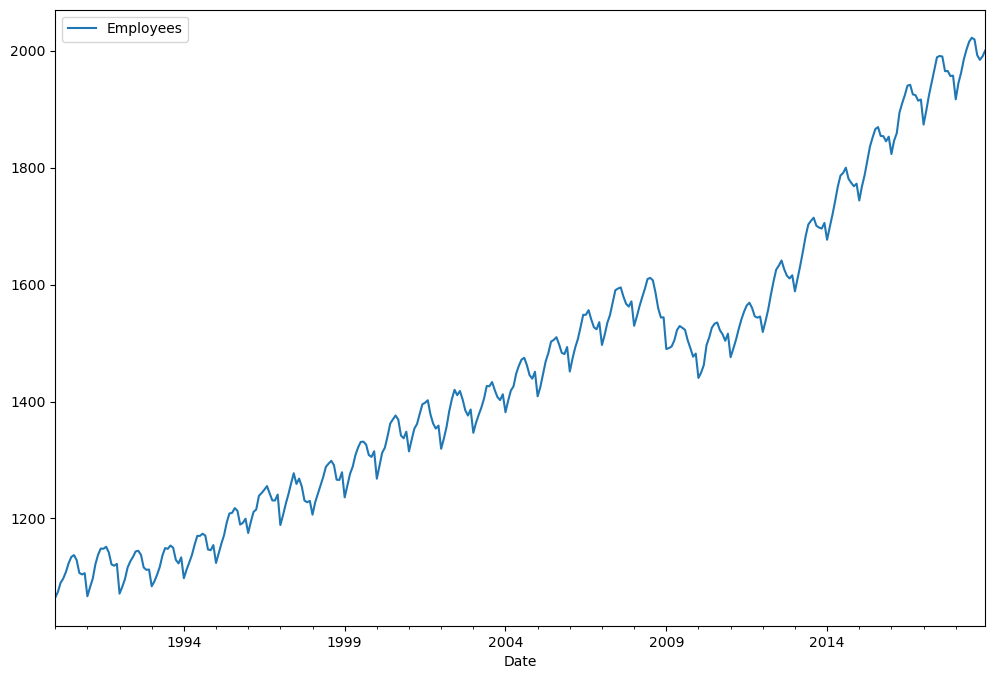

In [4]:
## CODE HERE
df.plot(figsize = (12,8))


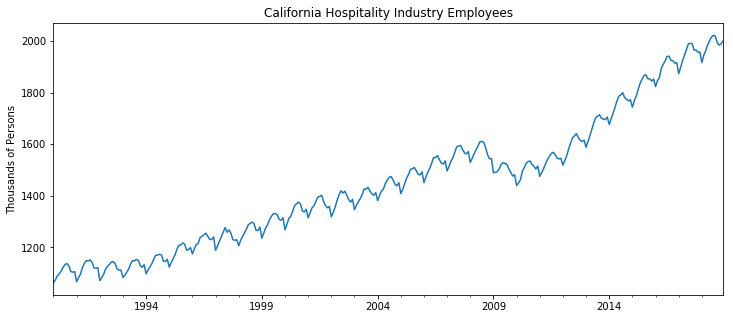

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

In [11]:
season_plt = seasonal_decompose(df['Employees'],model = 'additive')

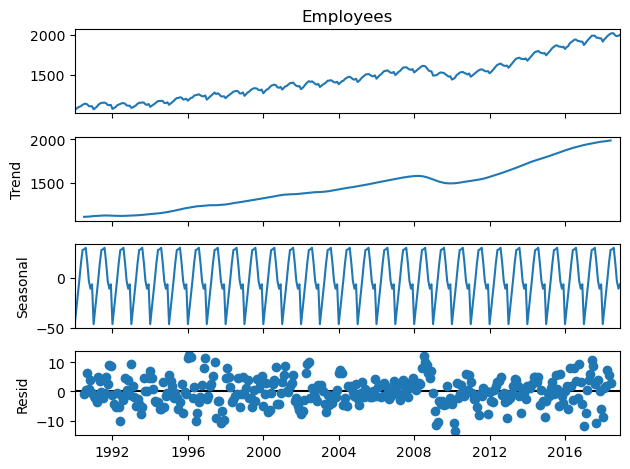

In [22]:
season_plt.plot();

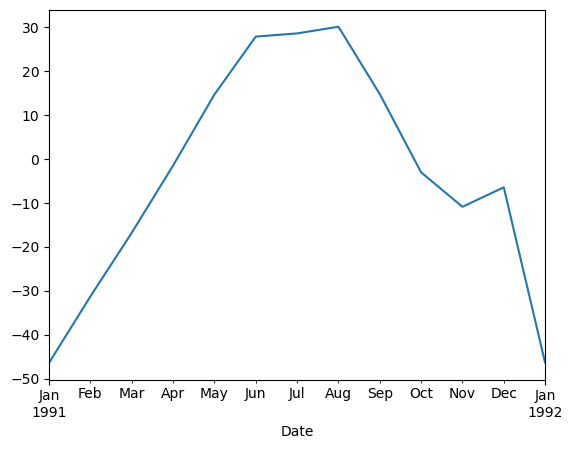

In [23]:
import matplotlib.pyplot as plt
season_plt.seasonal.plot()
plt.xlim('1991-01-01','1992-01-01')
plt.show()
#seaosnality of year

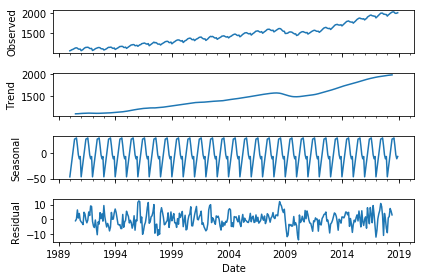

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [26]:
m_summary = auto_arima(df['Employees'],start_p= 0 , end_p = 5, start_q= 0 , end_q = 5, seasonal = True, m = 12,trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2232.831, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2974.636, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2707.381, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2980.790, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2707.813, Time=0.09 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=2233.771, Time=1.30 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2233.833, Time=1.09 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=2599.941, Time=0.44 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2233.543, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2233.847, Time=0.46 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : 

In [27]:
m_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 26 Sep 2024   AIC                           2208.505
Time:                                      01:27:16   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.578      0.000       0.837       1.013
ma.L1         -0.9442      0.070    -13.543      0.000      -1.081      -0.808
ma.L2          0.1287      0.060      2.144      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    706.533      0.000       0.994       1.000
ma.S.L12      -0.7492      0.043    -17.329      0.000      -0.834      -0.664
sigma2        29.2794      1.715     17.075      0.000      25.919      32.640
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.46
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.10
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [36]:
train = df.loc[:'2017-12-01']
test = df.loc['2018-01-01':]

In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [44]:
model = SARIMAX(train['Employees'],order = (0, 1, 0), seasonal_order = (2, 0, 0, 12), trend = 'ct')

In [45]:
result =  model.fit()

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [48]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start, end , typ = 'levels').rename('sarima prpedictions')

In [49]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

<Axes: xlabel='Date'>

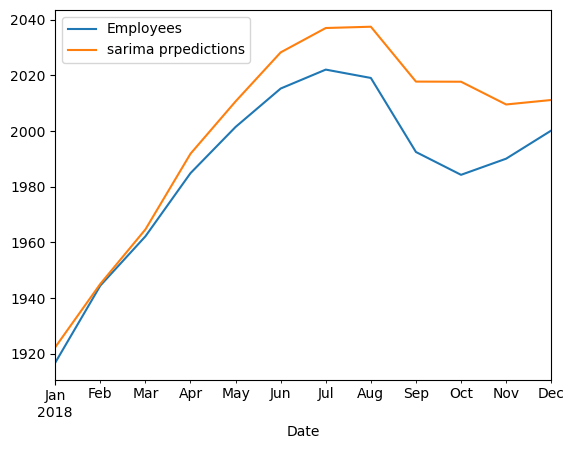

In [50]:
test['Employees'].plot(legend = True)
predictions.plot(legend = True)

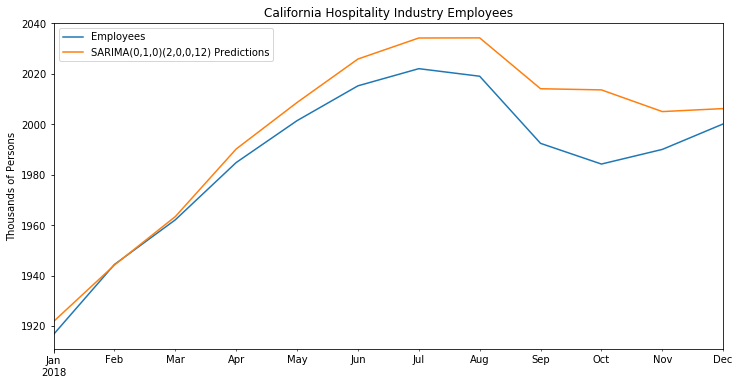

In [8]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [52]:
rmse(test['Employees'], predictions)

16.224723207921283

In [53]:
test['Employees'].mean()

1986.125

In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Retrain the model on the full data and forecast one year into the future

In [54]:
model = SARIMAX(df['Employees'],order = (0, 1, 0), seasonal_order = (2, 0, 0, 12), trend = 'ct')
result =  model.fit()

In [55]:
start = len(df)
end = len(df)+12
future = result.predict(start, end , typ = 'levels').rename('sarima prpedictions')

In [10]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

<Axes: xlabel='Date'>

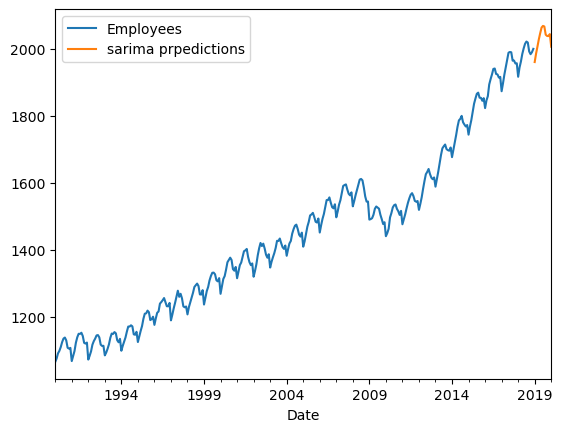

In [56]:
df['Employees'].plot(legend = True)
future.plot(legend = True)

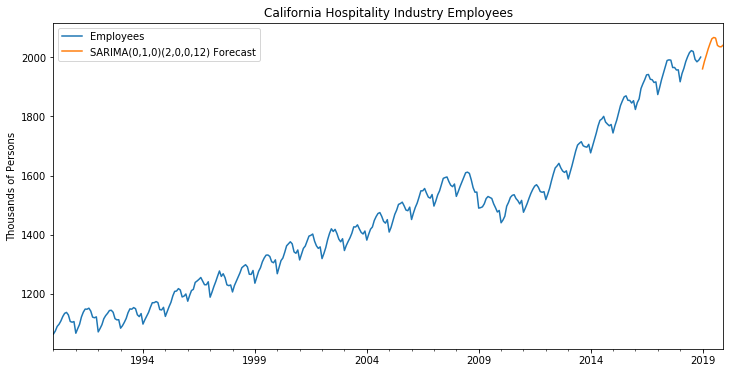

In [11]:
# DON'T WRITE HERE

## Great job!